In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# load the dataset
data=pd.read_csv('KC_houses_data.csv')
data

,square_footage,house_price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


In [69]:
data.head()

,square_footage,house_price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [70]:
data.tail()

,square_footage,house_price
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0
21612,1020,325000.0


In [71]:
data.isna().sum()

square_footage    0
house_price       0
dtype: int64

array([[<Axes: title={'center': 'square_footage'}>,
        <Axes: title={'center': 'house_price'}>]], dtype=object)

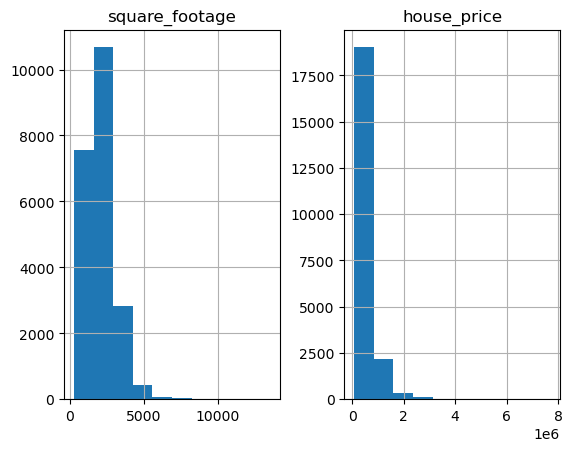

In [72]:
data.hist()

In [73]:
data.describe()

,square_footage,house_price
count,21613.000000,2.161300e+04
mean,2079.899736,5.401822e+05
std,918.440897,3.673622e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


In [ ]:
# Assign X-Input features and Y-Response feature

In [74]:
data.head(1)

,square_footage,house_price
0,1180,221900.0


In [75]:
x=data.iloc[:,:-1]
x.head(2)

,square_footage
0,1180
1,2570


In [76]:
y=data.iloc[:,-1:]
y.head(2)

,house_price
0,221900.0
1,538000.0


In [77]:
type(x)

pandas.core.frame.DataFrame

In [78]:
type(y)

pandas.core.frame.DataFrame

In [79]:
a=data.iloc[:,:-1].values
b=data.iloc[:,-1].values
print(type(a),type(b))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [80]:
a

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [81]:
b

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [82]:
data.corr()

,square_footage,house_price
square_footage,1.000000,0.702044
house_price,0.702044,1.000000


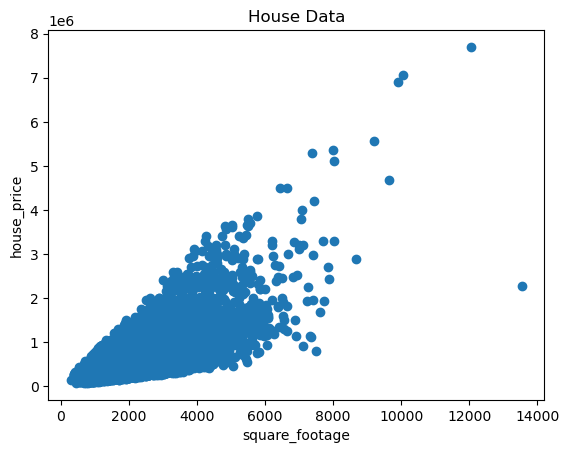

In [83]:
#visualize the dataset
plt.scatter(x,y)
plt.title('House Data')
plt.xlabel('square_footage')
plt.ylabel('house_price')
plt.show()

In [ ]:
# Split the data for training and testing

In [106]:
import sklearn

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [85]:
data.shape

(21613, 2)

In [86]:
xtrain.shape

(17290, 1)

In [87]:
xtest

,square_footage
6638,2410
7366,2170
3158,1450
9117,4500
3392,860
...,...
8494,1530
5359,1580
5242,2650
13777,820


In [ ]:
# Build the model with Linear Regression Algorithm

In [88]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#train the data
print('Training Started.....\n')
print()
lin_reg.fit(xtrain, ytrain)
print()
print('Training Completed.....')
print()
#test the data
print('Testing invoked.....\n')
ypred=lin_reg.predict(xtest)
print('Predicted Total Payment \n',ypred)
print("\n Testing is also completed....\n")

Training Started.....



Training Completed.....

Testing invoked.....

Predicted Total Payment 
 [[634010.47245009]
 [566604.40511647]
 [364386.20311562]
 ...
 [701416.5397837 ]
 [187445.27636488]
 [465495.30411605]]

 Testing is also completed....



In [89]:
ytest

,house_price
6638,735000.0
7366,1150000.0
3158,350500.0
9117,860000.0
3392,122000.0
...,...
8494,338000.0
5359,263000.0
5242,397450.0
13777,375000.0


In [90]:
diff=ytest-ypred
diff

,house_price
6638,100989.527550
7366,583395.594884
3158,-13886.203116
9117,-361004.975480
3392,-76679.620920
...,...
8494,-48854.892227
5359,-137897.822921
5242,-303966.539784
13777,187554.723635


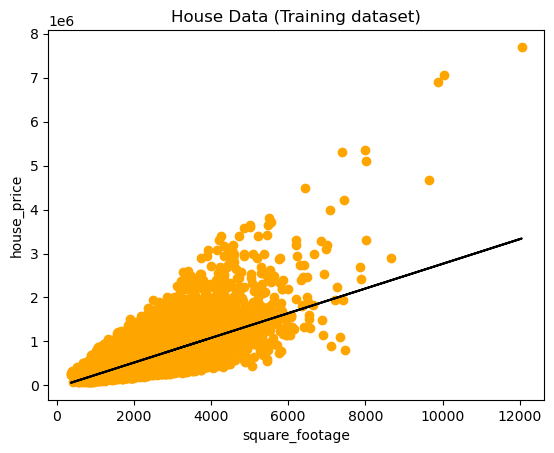

In [95]:
#Visualize the training dataset
plt.scatter(xtrain, ytrain, color='orange')
plt.plot(xtrain, lin_reg.predict(xtrain), color='black')
plt.title('House Data (Training dataset)')
plt.xlabel('square_footage')
plt.ylabel('house_price')
plt.show()

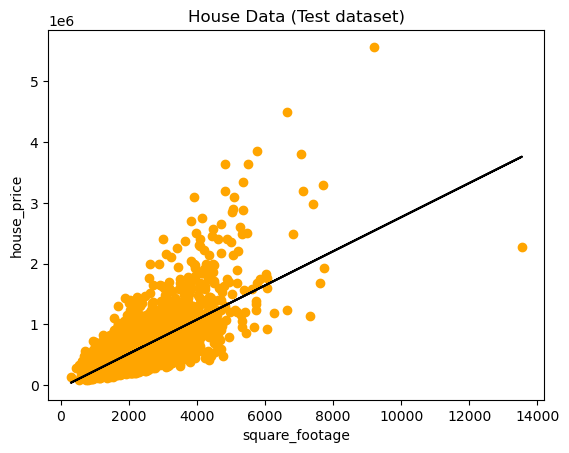

In [96]:
#Visualize the test dataset
plt.scatter (xtest,ytest, color="orange") 
plt.plot(xtest, lin_reg.predict(xtest), color="black")
plt.title('House Data (Test dataset)')
plt.xlabel('square_footage')
plt.ylabel('house_price')
plt.show()

In [ ]:
# Model performance via metrics

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('Mean Squared Error: \t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('Variance Score: \t', explained_variance_score (ytest,ypred))

# Coeficient of determination R_square
print()
print('R-Square:\t', r2_score(ytest,ypred))

Mean Squared Error: 	 69448332015.92175

RMSE:	 263530.5143923977

Variance Score: 	 0.5033690684771568

R-Square:	 0.5031460267811882


In [ ]:
#Multiple linear regression

In [108]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# load the dataset
data=pd.read_csv('KC_House_Data_multi.csv')
data

,square_footage,house_price,bedrooms,bathrooms
0,1180,221900.0,3,1.00
1,2570,538000.0,3,2.25
2,770,180000.0,2,1.00
3,1960,604000.0,4,3.00
4,1680,510000.0,3,2.00
...,...,...,...,...
21608,1530,360000.0,3,2.50
21609,2310,400000.0,4,2.50
21610,1020,402101.0,2,0.75
21611,1600,400000.0,3,2.50


In [110]:
data.head()

,square_footage,house_price,bedrooms,bathrooms
0,1180,221900.0,3,1.00
1,2570,538000.0,3,2.25
2,770,180000.0,2,1.00
3,1960,604000.0,4,3.00
4,1680,510000.0,3,2.00


In [111]:
data.tail()

,square_footage,house_price,bedrooms,bathrooms
21608,1530,360000.0,3,2.50
21609,2310,400000.0,4,2.50
21610,1020,402101.0,2,0.75
21611,1600,400000.0,3,2.50
21612,1020,325000.0,2,0.75


In [112]:
data.isna().sum()

square_footage    0
house_price       0
bedrooms          0
bathrooms         0
dtype: int64

array([[<Axes: title={'center': 'square_footage'}>,
        <Axes: title={'center': 'house_price'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>]], dtype=object)

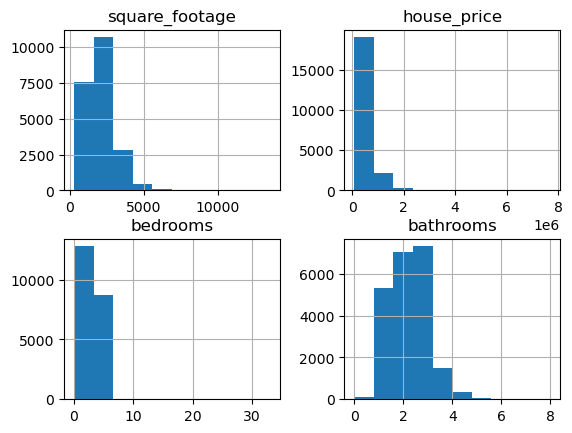

In [113]:
data.hist()

In [114]:
data.describe()

,square_footage,house_price,bedrooms,bathrooms
count,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,2079.899736,5.401822e+05,3.370842,2.114757
std,918.440897,3.673622e+05,0.930062,0.770163
min,290.000000,7.500000e+04,0.000000,0.000000
25%,1427.000000,3.219500e+05,3.000000,1.750000
50%,1910.000000,4.500000e+05,3.000000,2.250000
75%,2550.000000,6.450000e+05,4.000000,2.500000
max,13540.000000,7.700000e+06,33.000000,8.000000


In [ ]:
# Assign X-Input features and Y-Response feature

In [115]:
data.head(1)

,square_footage,house_price,bedrooms,bathrooms
0,1180,221900.0,3,1.0


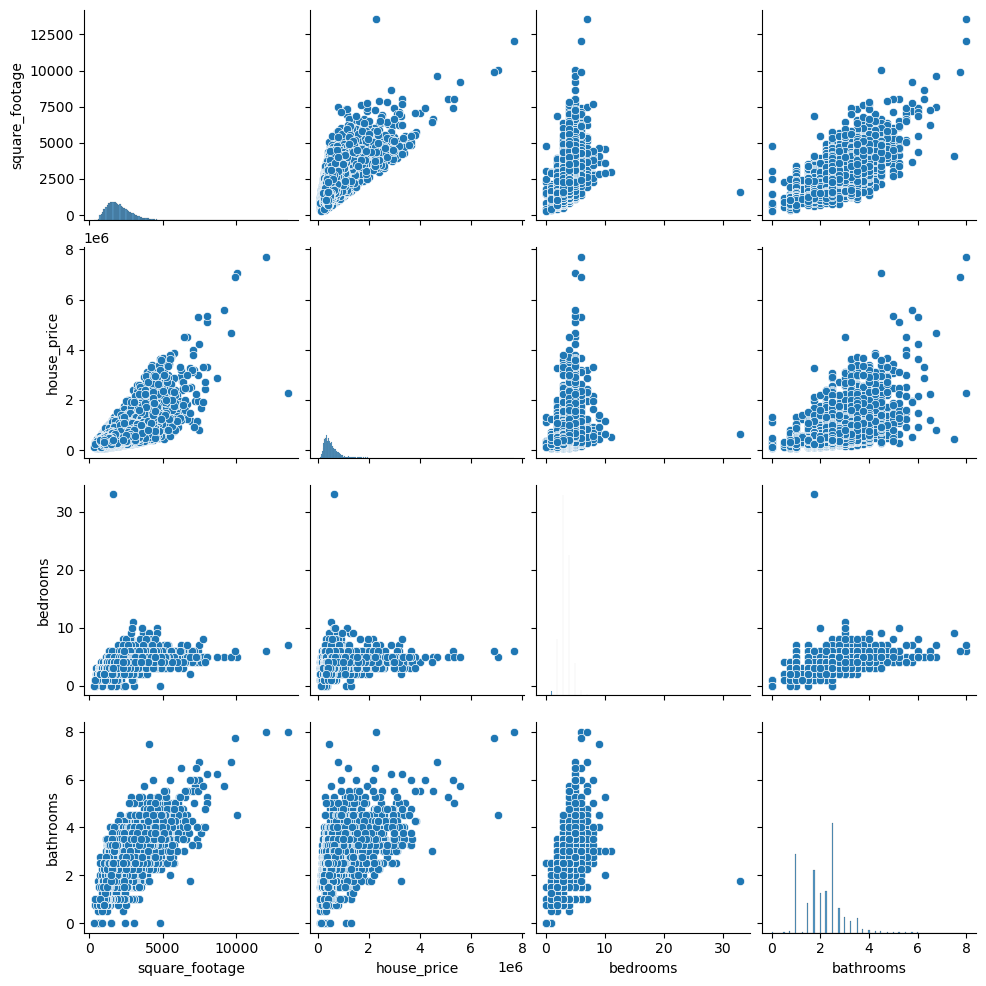

In [118]:
sns.pairplot(data)

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

In [25]:
data = pd.read_csv('KC_House_Data_multi.csv')
data

,square_footage,house_price,bedrooms,bathrooms
0,1180,221900.0,3,1.00
1,2570,538000.0,3,2.25
2,770,180000.0,2,1.00
3,1960,604000.0,4,3.00
4,1680,510000.0,3,2.00
...,...,...,...,...
21608,1530,360000.0,3,2.50
21609,2310,400000.0,4,2.50
21610,1020,402101.0,2,0.75
21611,1600,400000.0,3,2.50


In [26]:
X = data[['square_footage', 'bedrooms', 'bathrooms']]
y = data['house_price']

In [27]:
import sklearn

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
model = LinearRegression()

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

In [32]:
mae = mean_absolute_error(ytest, ypred)

mse = mean_squared_error(ytest, ypred)

rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 7.593386623213034e-11
Mean Squared Error (MSE): 9.912813062107231e-21
Root Mean Squared Error (RMSE): 9.956311095032754e-11


In [36]:
xsimple = data[['square_footage']]
xmultiple = data[['square_footage', 'bedrooms', 'bathrooms']]

xsimple_train, xsimple_test, ytrain, ytest = train_test_split(xsimple, y, test_size=0.2, random_state=2)
xmultiple_train, xmultiple_test, ytrain, ytest = train_test_split(xmultiple, y, test_size=0.2, random_state=2)

simple_model = LinearRegression()
multiple_model = LinearRegression()

simple_model.fit(xsimple_train, ytrain)
multiple_model.fit(xmultiple_train, ytrain)

ysimple_pred = simple_model.predict(xsimple_test)
ymultiple_pred = multiple_model.predict(xmultiple_test)

mae_simple = mean_absolute_error(ytest, ysimple_pred)
mse_simple = mean_squared_error(ytest, ysimple_pred)
rmse_simple = np.sqrt(mse_simple)

mae_multiple = mean_absolute_error(ytest, ymultiple_pred)
mse_multiple = mean_squared_error(ytest, ymultiple_pred)
rmse_multiple = np.sqrt(mse_multiple)

print("Results for Simple Linear Regression:")
print("MAE:", mae_simple)
print("MSE:", mse_simple)
print("RMSE:", rmse_simple)

print("\nResults for Multiple Linear Regression:")
print("MAE:", mae_multiple)
print("MSE:", mse_multiple)
print("RMSE:", rmse_multiple)

Results for Simple Linear Regression:
MAE: 175063.5372702569
MSE: 69448332015.92175
RMSE: 263530.5143923977

Results for Multiple Linear Regression:
MAE: 171691.5649013459
MSE: 67549437857.83024
RMSE: 259902.74692244065
